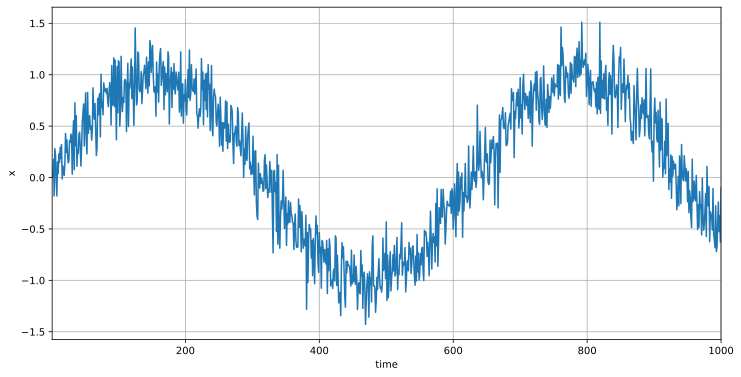

In [10]:
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l

T = 1000
time = torch.arange(1, T + 1, dtype=torch.float32)
x = torch.sin(0.01 * time) + torch.normal(0, 0.2, (T, ))
d2l.plot(time, [x], 'time', 'x', xlim=[1, 1000], figsize=(12, 6))
# 产生序列数据

In [11]:
# 将序列转换为特征-标签对
tau = 4
features = torch.zeros((T - tau, tau))
# 0填充
for i in range(tau):
    features[:, i] = x[i: T - tau + i]
labels = x[tau:].reshape((-1, 1))

batch_size, n_train = 16, 600
train_iter = d2l.load_array((features[:n_train], labels[:n_train]),
                            batch_size, is_train=True)

In [12]:
def init_weigths(m):
    if type(m) == nn.Linear:
        nn.init.xavier_uniform_(m.weight)

def get_net():
    net = nn.Sequential(nn.Linear(4, 10), 
                        nn.ReLU(), 
                        nn.Linear(10, 1))
    net.apply(init_weigths)
    return net

loss = nn.MSELoss(reduce='none')

/root/anaconda3/envs/pytorch/lib/python3.9/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


In [13]:
def train(net, train_iter, loss, epochs, lr):
    trainer = torch.optim.Adam(net.parameters(), lr)
    for epoch in range(epochs):
        for X, y in train_iter:
            trainer.zero_grad()
            l = loss(net(X), y)
            l.sum().backward()
            trainer.step()

        print(f'epoch{epoch + 1},'
              f'loss:{d2l.evaluate_loss(net, train_iter, loss):f}')
        
net = get_net()

train(net, train_iter, loss, 50, 0.01)

epoch1,loss:0.052907
epoch2,loss:0.050883
epoch3,loss:0.049304
epoch4,loss:0.047689
epoch5,loss:0.048401
epoch6,loss:0.047472
epoch7,loss:0.047241
epoch8,loss:0.046326
epoch9,loss:0.045924
epoch10,loss:0.049425
epoch11,loss:0.049528
epoch12,loss:0.046994
epoch13,loss:0.047283
epoch14,loss:0.045427
epoch15,loss:0.045290
epoch16,loss:0.047387
epoch17,loss:0.046823
epoch18,loss:0.045870
epoch19,loss:0.046499
epoch20,loss:0.047144
epoch21,loss:0.045623
epoch22,loss:0.045616
epoch23,loss:0.048127
epoch24,loss:0.046765
epoch25,loss:0.045487
epoch26,loss:0.045229
epoch27,loss:0.046726
epoch28,loss:0.044975
epoch29,loss:0.046071
epoch30,loss:0.046485
epoch31,loss:0.045564
epoch32,loss:0.047158
epoch33,loss:0.045724
epoch34,loss:0.050890
epoch35,loss:0.047696
epoch36,loss:0.045710
epoch37,loss:0.045591
epoch38,loss:0.045659
epoch39,loss:0.047038
epoch40,loss:0.050316
epoch41,loss:0.046008
epoch42,loss:0.047377
epoch43,loss:0.047693
epoch44,loss:0.049045
epoch45,loss:0.048974
epoch46,loss:0.0489

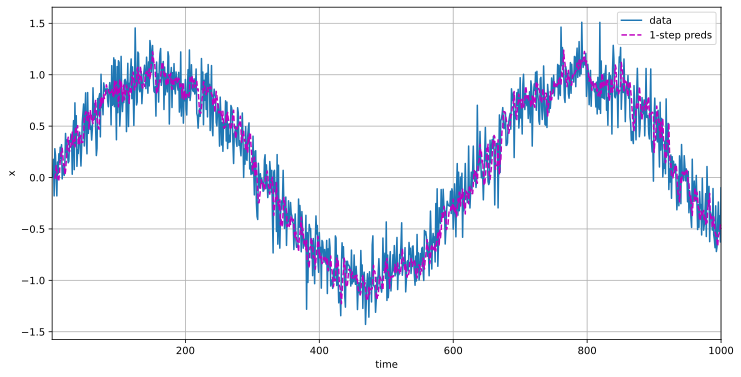

In [14]:
onestep_preds = net(features)
d2l.plot([time, time[tau:]],
         [x.detach().numpy(), onestep_preds.detach().numpy()], 'time',
         'x', legend=['data', '1-step preds'], xlim=[1, 1000], figsize=(12, 6))

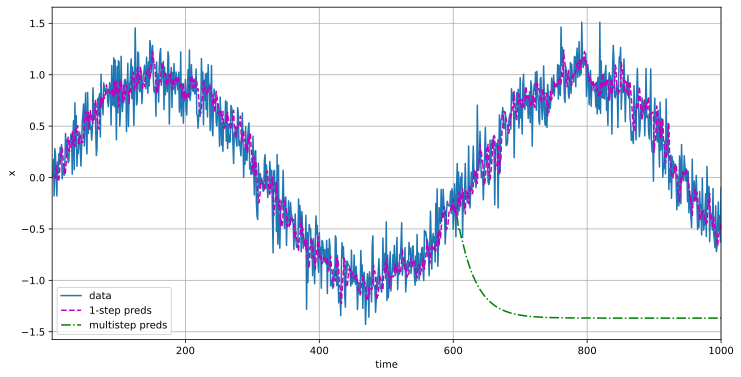

In [15]:
multistep_preds = torch.zeros(T)
multistep_preds[: n_train + tau] = x[: n_train + tau]

for i in range(n_train + tau, T):
    multistep_preds[i] = net(
        multistep_preds[i - tau:i].reshape((1, -1)))
    
d2l.plot([time, time[tau:], time[n_train + tau:]],
         [x.detach().numpy(), onestep_preds.detach().numpy(),
          multistep_preds[n_train + tau:].detach().numpy()], 'time',
          'x', legend=['data', '1-step preds', 'multistep preds'],
          xlim=[1, 1000], figsize=(12, 6))

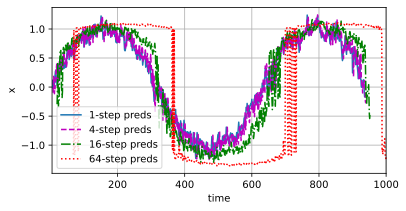

In [16]:
max_steps = 64

features = torch.zeros((T - tau - max_steps + 1, tau + max_steps))

for i in range(tau):
    features[:, i] = x[i : i + T - tau - max_steps + 1]

for i in range(tau, tau+max_steps):
    features[:, i] = net(features[:, i - tau: i]).reshape(-1)

steps = (1, 4, 16, 64)
d2l.plot([time[tau + i - 1: T - max_steps + i] for i in steps],
         [features[:, (tau + i - 1)].detach().numpy() for i in steps], 'time', 'x',
         legend=[f'{i}-step preds' for i in steps], xlim=[5, 1000],
         figsize=(6, 3))